In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv('X_train.csv',header=None)
test_data=pd.read_csv('X_test.csv',header=None)
test_y=pd.read_csv('y_test.csv',header=None)
train_y=pd.read_csv('y_train.csv',header=None)

In [3]:
train_data_p2=train_data.copy()
test_data_p2=test_data.copy()
train_data_p2.columns=['a','b','c','d','e','f','g']
test_data_p2.columns=['a','b','c','d','e','f','g']
col_names=['a','b','c','d','e','f']
for i in range(6):
    new_col=col_names[i]+'2'
    train_data_p2[new_col]=train_data_p2[col_names[i]]*train_data_p2[col_names[i]]
    test_data_p2[new_col]=test_data_p2[col_names[i]]*test_data_p2[col_names[i]]

In [4]:
train_data_p3=train_data_p2.copy()
test_data_p3=test_data_p2.copy()
col_names=['a','b','c','d','e','f']
for i in range(6):
    new_col=col_names[i]+'3'
    train_data_p3[new_col]=train_data_p3[col_names[i]]*train_data_p3[col_names[i]]*train_data_p3[col_names[i]]
    test_data_p3[new_col]=test_data_p3[col_names[i]]*test_data_p3[col_names[i]]*test_data_p3[col_names[i]]

In [5]:
train_data=np.array(train_data)
test_data=np.array(test_data)
train_y=np.array(train_y.iloc[:,0].values)
test_y=np.array(test_y.iloc[:,0].values)

In [6]:
lam_values=np.arange(0,5001)

In [7]:
errors=[]
degf=[]
w=[]
x=train_data
x_transpose=train_data.transpose()

for lamb in lam_values:
    ident_matrix=np.identity(n=7)
    temp=lamb*ident_matrix+np.matmul(x_transpose,x)
    inverse = np.linalg.inv(temp)
    weights = np.matmul(np.matmul(inverse,x_transpose),train_y)
    y_predict=np.matmul(test_data,weights)
    rmse=(y_predict-test_y)*(y_predict-test_y)
    rmse=math.sqrt(sum(rmse)/len(y_predict))
    errors.append(rmse)
    temp2= np.matmul(x,inverse)
    temp2= np.matmul(temp2,x_transpose)
    df_lambda=np.trace(temp2)
    degf.append(df_lambda)
    w.append(weights)

In [8]:
df = pd.DataFrame(w, columns=['w1','w2','w3','w4','w5','w6','w7'])
df['df_lambda']=degf

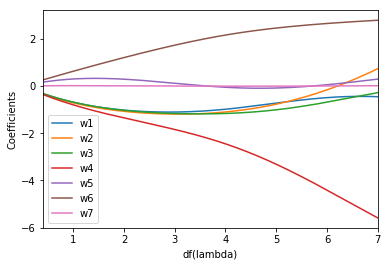

In [9]:
df.plot(x='df_lambda',y=['w1','w2','w3','w4','w5','w6','w7'],)
plt.gca().invert_xaxis()
plt.xlabel('df(lambda)')
plt.ylabel('Coefficients')

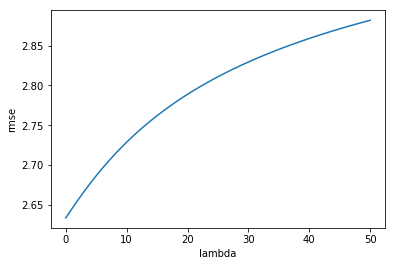

In [10]:
x1=lam_values[0:501]
y1=errors[0:501]
plt.plot(lam_values[0:51],errors[0:51])
plt.xlabel('lambda')
plt.ylabel('rmse')

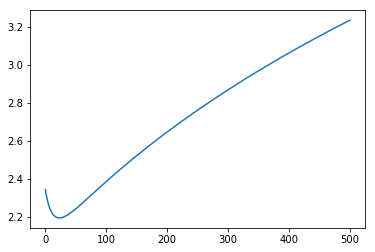

In [11]:
#p=2

lam_values=np.arange(0,501)
errors=[]
degf=[]
w=[]
x=train_data_p2
x_transpose=train_data_p2.transpose()

for lamb in lam_values:
    ident_matrix=np.identity(n=13)
    temp=lamb*ident_matrix+np.matmul(x_transpose,x)
    inverse = np.linalg.inv(temp)
    weights = np.matmul(np.matmul(inverse,x_transpose),train_y)
    y_predict=np.matmul(test_data_p2,weights)
    rmse=(y_predict-test_y)*(y_predict-test_y)
    rmse=math.sqrt(sum(rmse)/len(y_predict))
    errors.append(rmse)
    temp2= np.matmul(x,inverse)
    temp2= np.matmul(temp2,x_transpose)
    df_lambda=np.trace(temp2)
    degf.append(df_lambda)
    w.append(weights)

plt.plot(lam_values,errors)

x2=lam_values
y2=errors



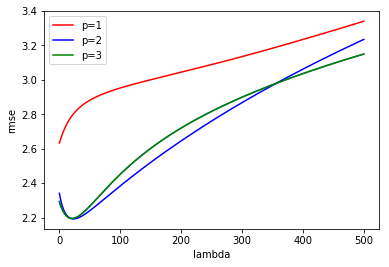

In [12]:
#p=3

lam_values=np.arange(0,501)
errors=[]
degf=[]
w=[]
x=train_data_p3
x_transpose=train_data_p3.transpose()

for lamb in lam_values:
    ident_matrix=np.identity(n=19)
    temp=lamb*ident_matrix+np.matmul(x_transpose,x)
    inverse = np.linalg.inv(temp)
    weights = np.matmul(np.matmul(inverse,x_transpose),train_y)
    y_predict=np.matmul(test_data_p3,weights)
    rmse=(y_predict-test_y)*(y_predict-test_y)
    rmse=math.sqrt(sum(rmse)/len(y_predict))
    errors.append(rmse)
    temp2= np.matmul(x,inverse)
    temp2= np.matmul(temp2,x_transpose)
    df_lambda=np.trace(temp2)
    degf.append(df_lambda)
    w.append(weights)

plt.plot(lam_values,errors)
x3=lam_values
y3=errors

plt.plot(x1,y1,'r',label='p=1')
plt.plot(x2,y2,'b',label='p=2')
plt.plot(x3,y3,'g',label='p=3')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('rmse')
plt.show()